In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

def set_default_plot_properties():
    plt.style.use('mpl20')
    matplotlib.rcParams['figure.dpi'] = 100
    matplotlib.rcParams['figure.figsize'] = 15, 5

def sns_set_size(height, width):
    sns.set(rc={'figure.figsize':(width, height)})

set_default_plot_properties()

import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Creating a data frame
df = pd.read_csv("../datasets/bank-additional-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [13]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [14]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [15]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [16]:
for col in df.columns:
    print(f'Column "{col}" unique values: {df[col].unique()}\n\n')

Column "age" unique values: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Column "job" unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Column "marital" unique values: ['married' 'single' 'divorced' 'unknown']


Column "education" unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Column "default" unique values: ['no' 'unknown' 'yes']


Column "housing" unique values: ['no' 'yes' 'unknown']


Column "loan" unique values: ['no' 'yes' 'unknown']


Column "contact" unique values: ['telephone' 'cellular']


Column "month" unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Col

### Analyze feature importance

In [17]:
SEED = 42
features_df = df.drop('y', axis=1, inplace=False)
target_df = pd.Series(pd.factorize(df['y'])[0])

dummy_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
dummy_features_df = pd.get_dummies(features_df[dummy_cols], columns=dummy_cols)
for col in [numeric_col for numeric_col in features_df.columns if numeric_col not in dummy_cols]:
    dummy_features_df[col] = features_df[col]

print('Dummy feature columns: ' )
print(dummy_features_df.columns.tolist())
dummy_features_df.head()

Dummy feature columns: 
['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'age', 'duration', 'campaign

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,0,0,0,0,0,0,0,1,0,0,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,0,0,0,0,0,0,0,1,0,0,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,1,0,0,0,0,0,0,0,0,0,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,0,0,0,0,0,0,0,1,0,0,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [18]:
target_df.unique()

array([0, 1])

In [19]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(dummy_features_df, target_df, test_size=0.2, random_state=SEED)
X_train_full.shape, X_test_full.shape

((32950, 63), (8238, 63))

In [20]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_full, y_train_full)
sorted_idx = rf.feature_importances_.argsort()

Text(0.5, 0, 'Random Forest Feature Importance')

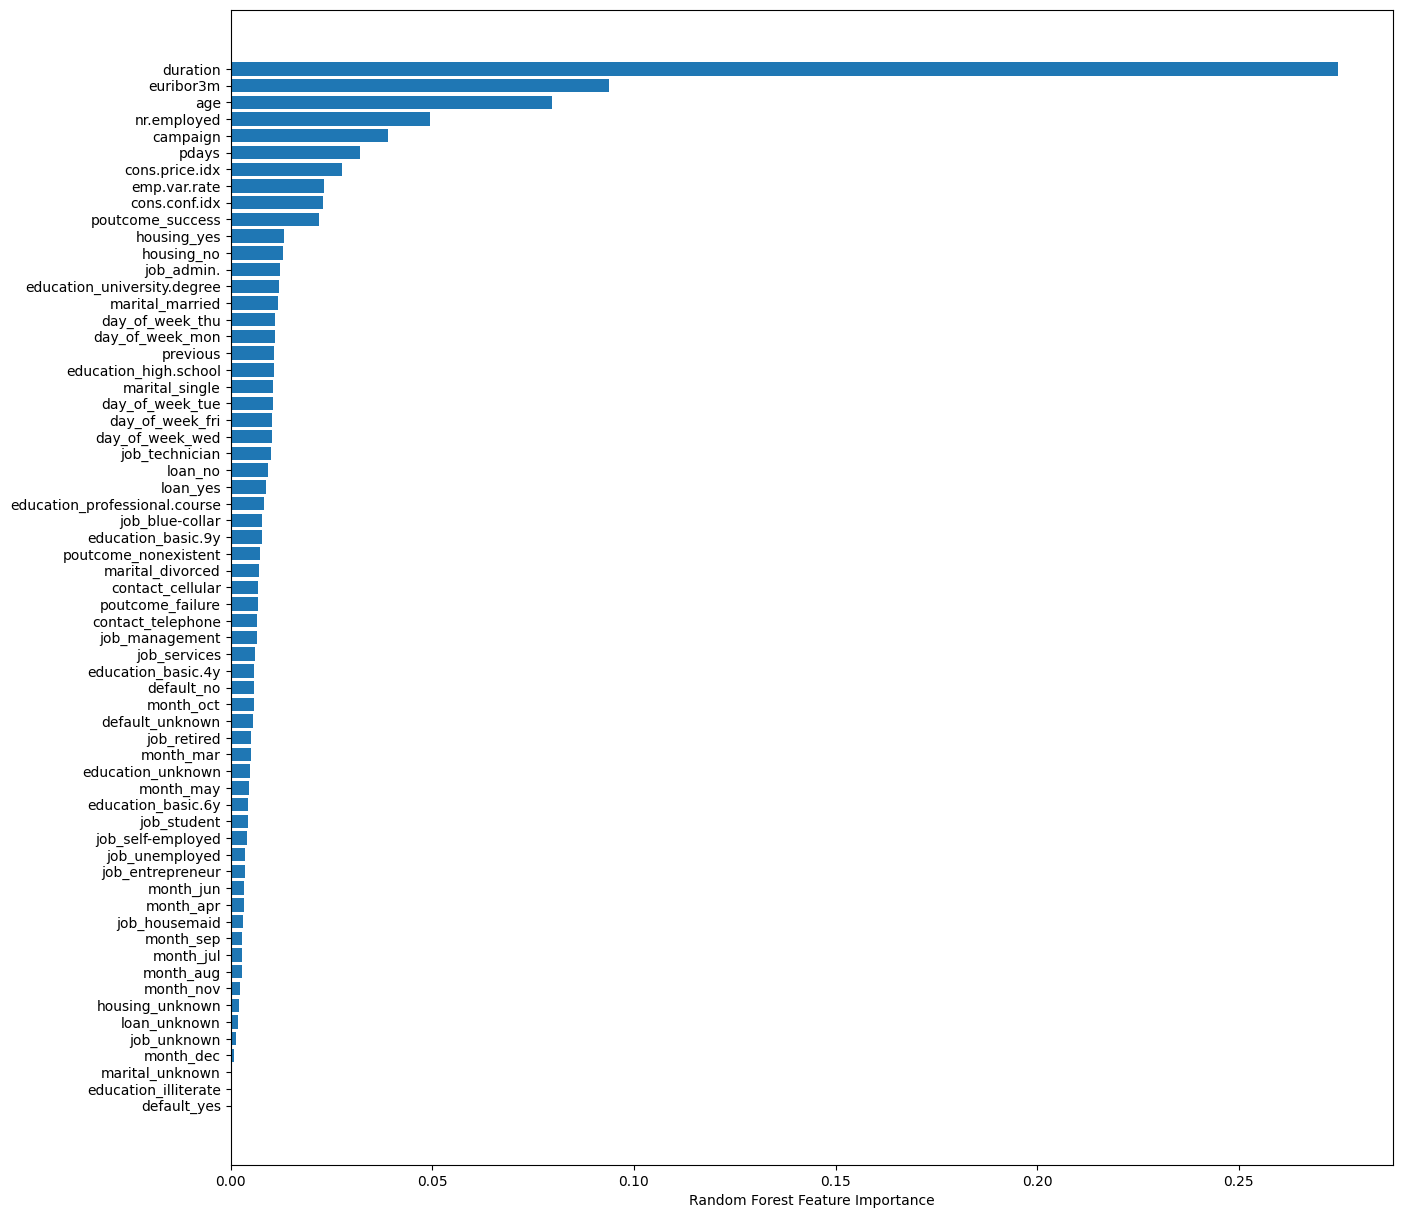

In [21]:
matplotlib.rcParams['figure.figsize'] = 15, 15
plt.barh(dummy_features_df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [22]:
set_default_plot_properties()

### Choose columns for concept drifts

In [26]:
df[df['age'] <= 33]['age'].count()

13009

In [27]:
df[df['age'] > 33]['age'].count()

28179

In [28]:
df[df['age'] <= 33].to_csv('../datasets/bank_less_33.csv', index=False)

In [29]:
df[df['age'] > 33].to_csv('../datasets/bank_greater_33.csv', index=False)

### Use River data generators to create concept drifts

In [1]:
from river.datasets import synth

dataset = synth.ConceptDriftStream(stream=synth.SEA(seed=42, variant=0),
                                   drift_stream=synth.SEA(seed=42, variant=1),
                                   seed=1, position=5, width=2)

for x, y in dataset.take(10):
    print(x, y)

{0: 6.394267984578837, 1: 0.25010755222666936, 2: 2.7502931836911926} False
{0: 2.2321073814882277, 1: 7.364712141640124, 2: 6.766994874229113} True
{0: 6.394267984578837, 1: 0.25010755222666936, 2: 2.7502931836911926} False
{0: 8.921795677048454, 1: 0.8693883262941615, 2: 4.2192181968527045} True
{0: 2.2321073814882277, 1: 7.364712141640124, 2: 6.766994874229113} True
{0: 8.921795677048454, 1: 0.8693883262941615, 2: 4.2192181968527045} True
{0: 0.29797219438070344, 1: 2.1863797480360336, 2: 5.053552881033624} False
{0: 0.26535969683863625, 1: 1.988376506866485, 2: 6.498844377795232} False
{0: 5.449414806032166, 1: 2.204406220406967, 2: 5.892656838759088} False
{0: 8.094304566778266, 1: 0.06498759678061017, 2: 8.05819251832808} False


In [30]:
from river import drift

def find_drifts(dataset, drift_detector, value_key):
    drifts = []
    for i, (val, y) in enumerate(dataset):
        drift_detector.update(val[value_key])   # Data is processed one sample at a time
        if drift_detector.drift_detected:
            # The drift detector indicates after each sample if there is a drift in the data
            print(f'Change detected at index {i}')
            drifts.append(i)

        if i + 1 == 100_000:
            break

    return drifts

In [31]:
drift_detector = drift.ADWIN()
find_drifts(dataset, drift_detector, value_key=2)

[]

In [33]:
from source.bank_dataset import BankDataset

less_33_dataset = BankDataset(filename='bank_less_33.csv', delimiter=',')
greater_33_dataset = BankDataset(filename='bank_greater_33.csv', delimiter=',')

bank_dataset = synth.ConceptDriftStream(stream=greater_33_dataset,
                                        drift_stream=less_33_dataset,
                                        seed=42)

for x, y in bank_dataset.take(10):
    print(x, y)

{'age': 56, 'job': 'housemaid', 'marital': 'married', 'education': 'basic.4y', 'default': 'no', 'housing': 'no', 'loan': 'no', 'contact': 'telephone', 'month': 'may', 'day_of_week': 'mon', 'duration': 261, 'campaign': 1, 'pdays': 999, 'previous': 0, 'poutcome': 'nonexistent', 'emp.var.rate': 1.1, 'cons.price.idx': 93.994, 'cons.conf.idx': -36.4, 'euribor3m': 4.857, 'nr.employed': 5191.0} no
{'age': 57, 'job': 'services', 'marital': 'married', 'education': 'high.school', 'default': 'unknown', 'housing': 'no', 'loan': 'no', 'contact': 'telephone', 'month': 'may', 'day_of_week': 'mon', 'duration': 149, 'campaign': 1, 'pdays': 999, 'previous': 0, 'poutcome': 'nonexistent', 'emp.var.rate': 1.1, 'cons.price.idx': 93.994, 'cons.conf.idx': -36.4, 'euribor3m': 4.857, 'nr.employed': 5191.0} no
{'age': 37, 'job': 'services', 'marital': 'married', 'education': 'high.school', 'default': 'no', 'housing': 'yes', 'loan': 'no', 'contact': 'telephone', 'month': 'may', 'day_of_week': 'mon', 'duration': 2

In [34]:
drift_detector = drift.ADWIN()
find_drifts(bank_dataset, drift_detector, value_key='age')

Change detected at index 767
Change detected at index 4799
Change detected at index 5311
Change detected at index 6239
Change detected at index 8447
Change detected at index 10751
Change detected at index 12991
Change detected at index 14079
Change detected at index 15295
Change detected at index 17599


[767, 4799, 5311, 6239, 8447, 10751, 12991, 14079, 15295, 17599]

In [35]:
copy_bank_df = pd.Series([x['age'] for x, y in bank_dataset])
copy_bank_df.head()

0    56
1    57
2    37
3    40
4    56
dtype: int64

<AxesSubplot:>

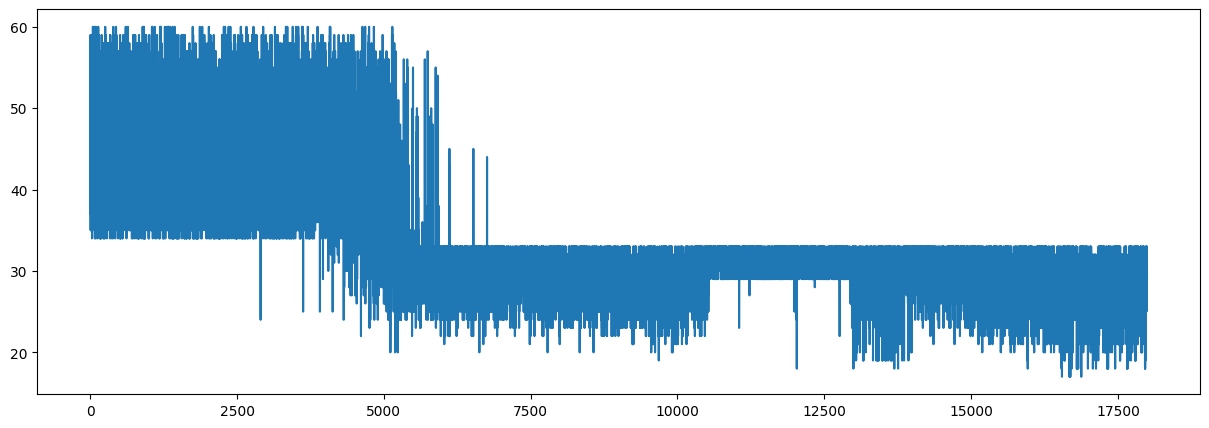

In [42]:
set_default_plot_properties()
sns.lineplot(data=copy_bank_df)